# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Credit analysis with KNN/DTree/RF/Bagging🏦</p>

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/09/1-Credit-card-fraud-detection-with-classification-algorithms.png?w=750&ssl=1">


<p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Table Of Contents</p>   
    
* [1. Importing Modules](#1)
    
* [2. Loading Data](#2)
    
* [3. Data PreProcessing And Visualizations](#3)
    
* [4. Utility Functions](#4) 

* [5. Data Balancing](#5)   
      
* [6. Modelling And Optimizing The Models](#6)
    
* [7. Results And Conclusion](#7)
 


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Modules</p>

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2021-10-23 10:23:14.904460: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
tf.test.gpu_device_name()

2021-10-23 10:23:22.120975: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 10:23:22.124366: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-23 10:23:22.127891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-23 10:23:22.175407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 10:23:22.176139: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla 

'/device:GPU:0'

<a id = "2"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Loading Data</p>

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Categorical Columns</p>

In [5]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

<a id = "4"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Utility Functions</p>

In [6]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)




<a id= "3"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data PreProcessing And Visualizations</p>




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking Distribution For Continuous Variables</p>

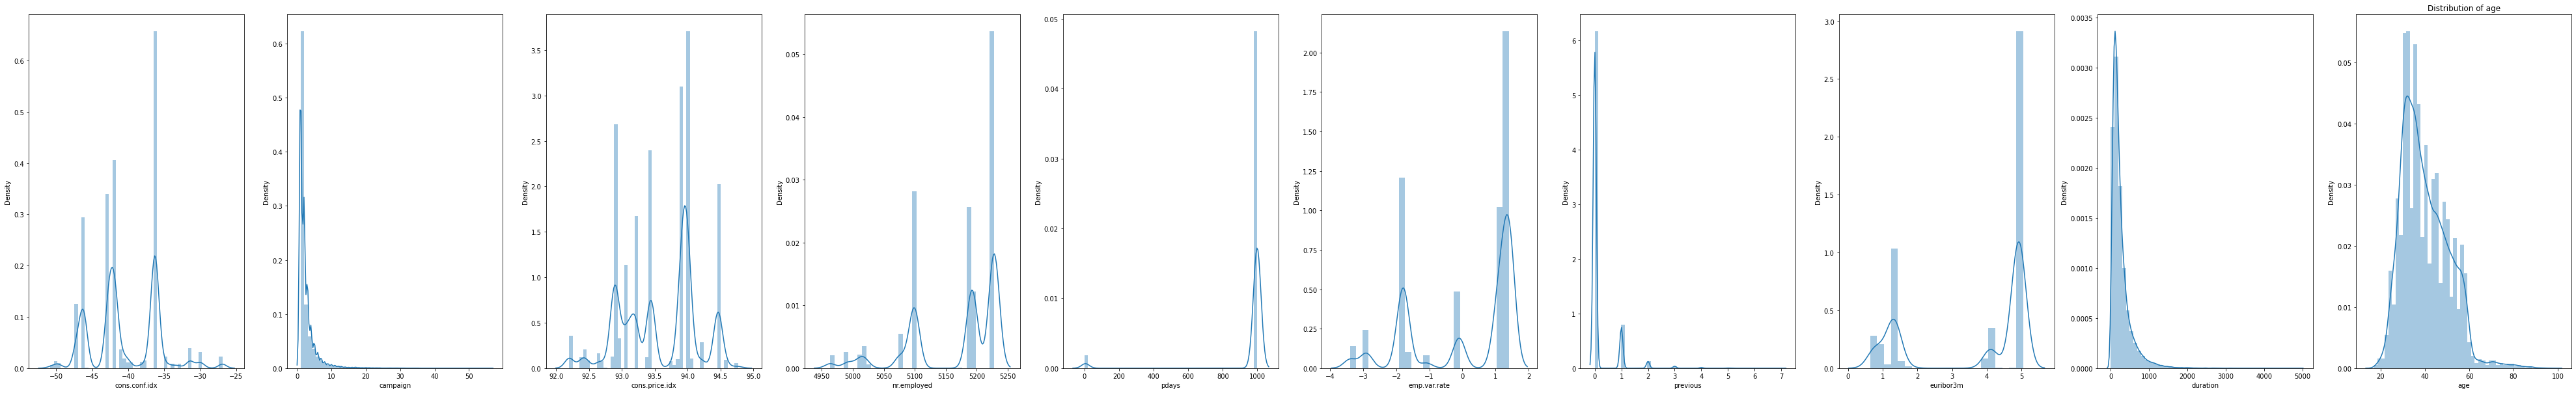

In [7]:
check_normal(df)

> **None of the features are following a normal distribution**




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Plots For Categorical Variables</p>

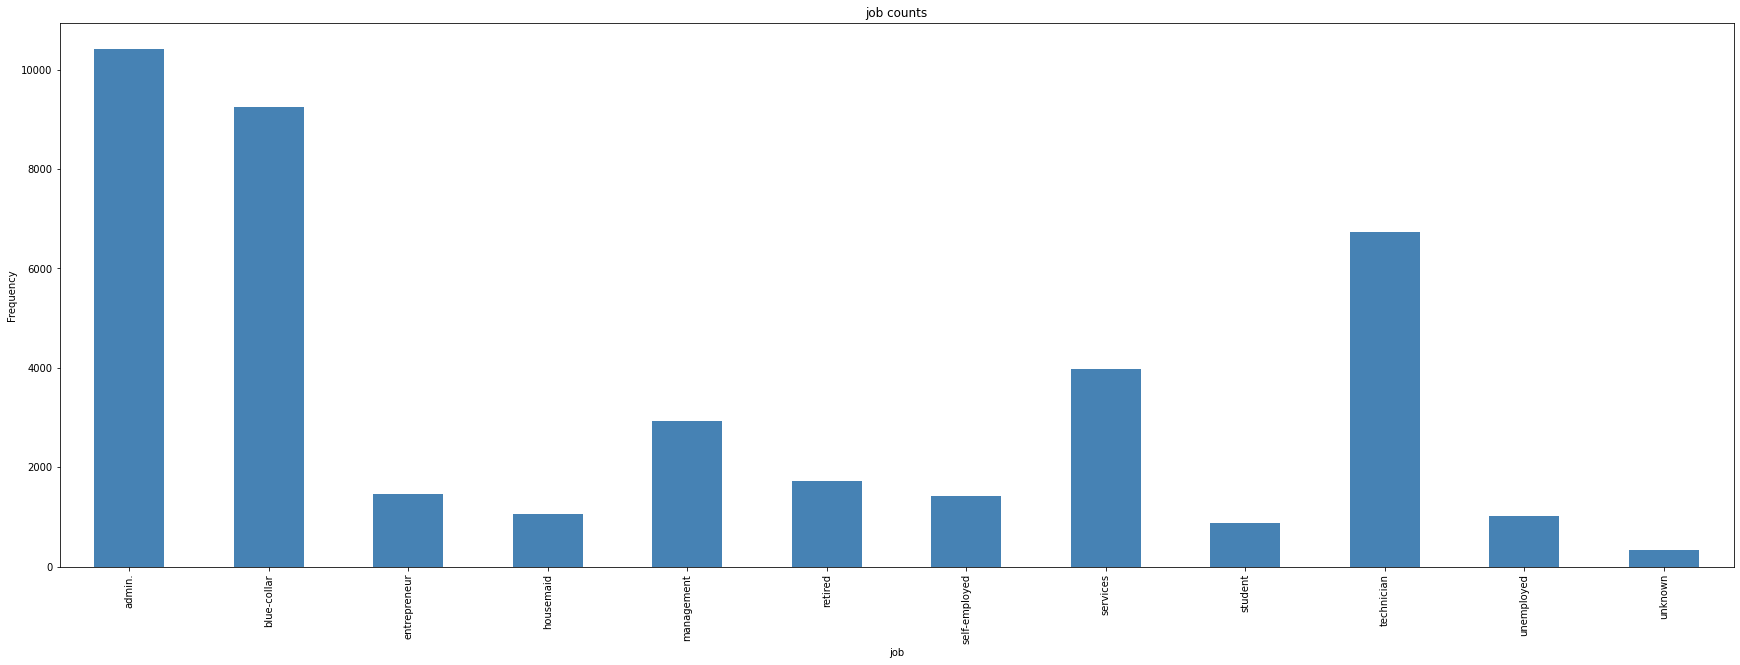

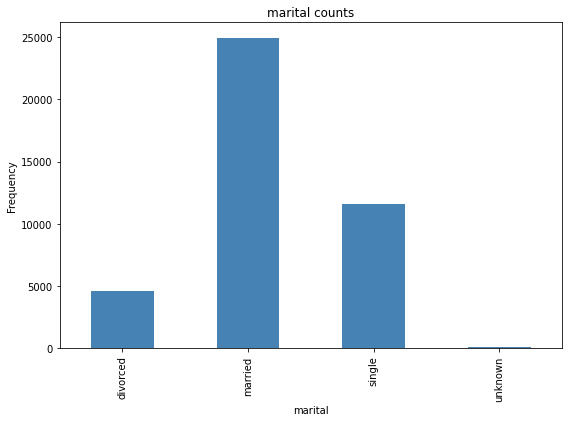

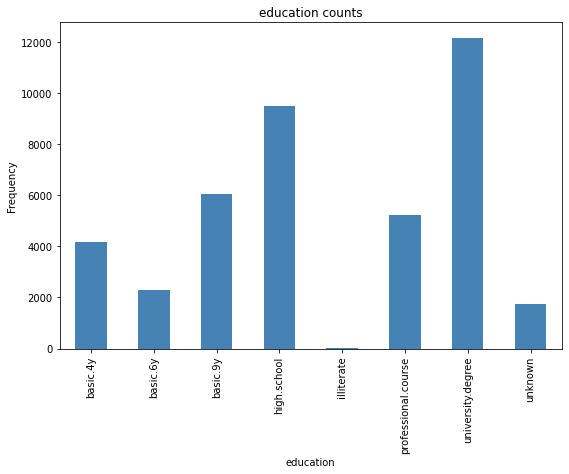

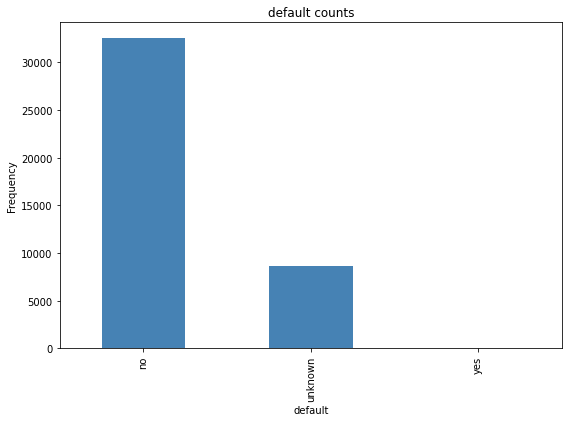

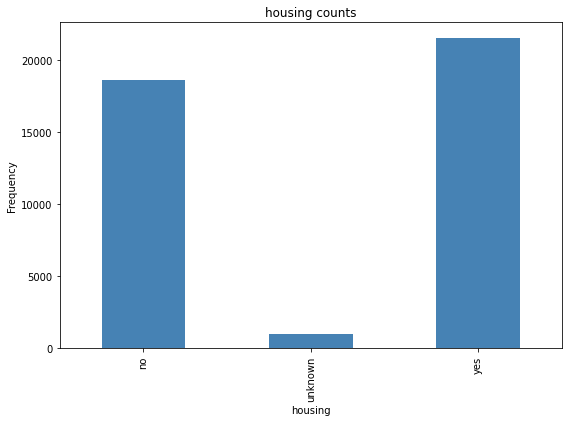

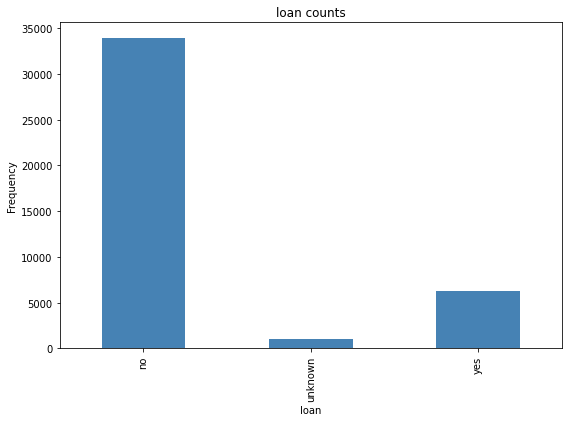

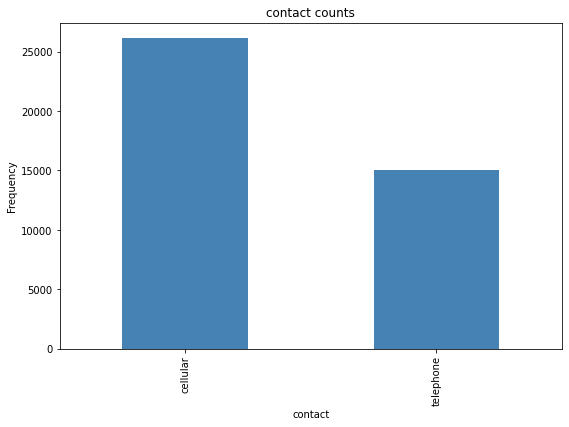

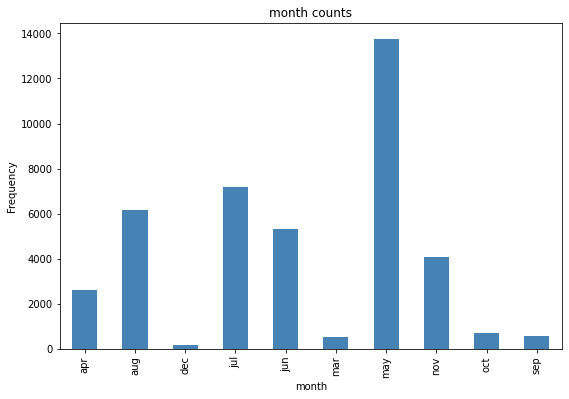

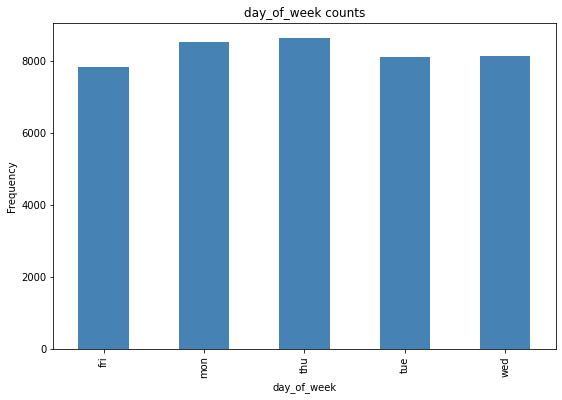

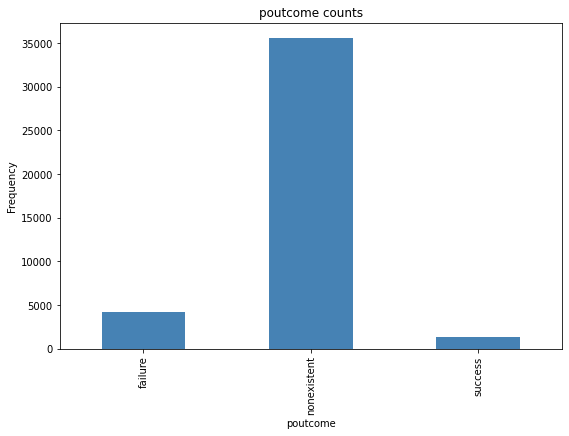

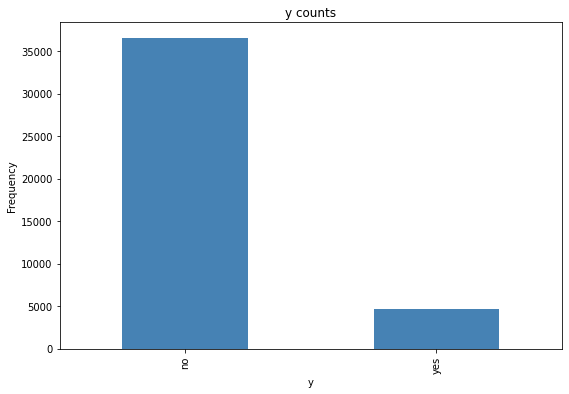

In [8]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **Class imbalance observed for target variable**




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Highly Correlated Columns</p>

In [9]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


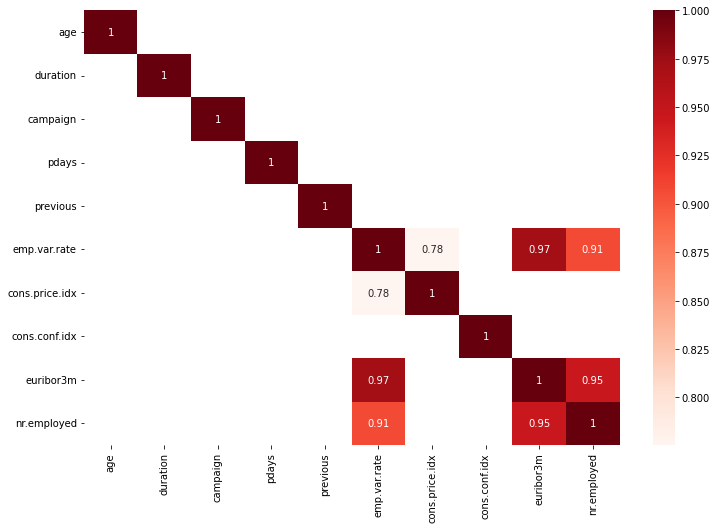

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

> Some correlation can be seen here between emp. var rate and nr.employed.

> Also, euribor3m and emp.var rate.

> However,  I would not be removing any. As I am gonna mostly be training on tree models which doesn't require much preprocessing.

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking Unique Values For Days Column</p>

In [11]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

> **999 represents no contact has been done, thus i'll be assigning it a very less weight.**


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modifying The Columns: Assigning Weight On the Basis Of Importance</p>

In [12]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))





# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Dropping Columns Which I Feel Won't Affect The Predictions</p>

In [13]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">One Hot Encoding Remaining Categorical Features</p>

In [14]:
df  = pd.get_dummies(df, drop_first = True)




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Train-Test Split</p>

In [15]:
x = df.drop("y", axis=1)
y = df['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)


<a id ="5"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Balancing The Data Using Smote</p>

In [16]:

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 30891
Resampled dataset shape 54808



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">For Scaling The Data</p>

In [17]:
s = StandardScaler()


In [18]:
(x_train.shape[1])

25

<a id ="6"></a>


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling And Optimizing The Models</p>




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With KNN</p>

In [19]:

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit( s.fit_transform(x_train), y_train)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test), y_smote,y_test)



Train accuracy is: 0.5834184790541527
Test accuracy is: 0.899970865300573

Train ROC is: 0.5834184790541528
Test ROC is: 0.5866885351386584

F score is: 0.290633608815427
Precision is: 0.705685618729097
Recall is: 0.18300086730268864



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Tuning The Hyperparameterrs Of KNN</p>

In [20]:

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit( s.fit_transform(x_train), y_train)
 pred_i = knn.predict(s.transform(x_test))
 error_rate.append(np.mean(pred_i != y_test))

acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(s.fit_transform(x_train), y_train)
    yhat = neigh.predict(s.transform(x_test))
    acc.append(metrics.accuracy_score(y_test, yhat))
    

Minimum error:- 0.09624162377391474 at K = 10


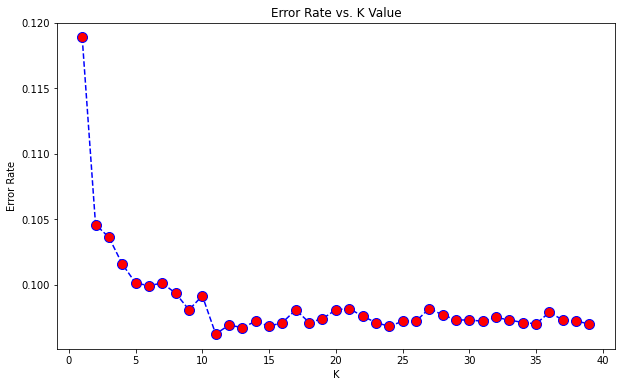

In [21]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Maximum accuracy:- 0.9037583762260852 at K = 10


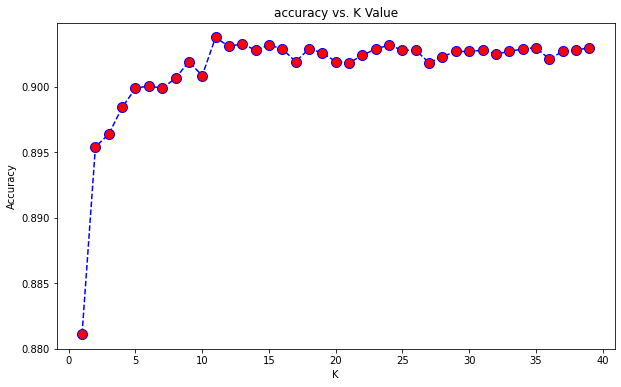

In [22]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With The Value Of K which Gave Least Error</p>

In [23]:

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit( s.fit_transform(x_smote), y_smote)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test),y_smote,y_test)

Train accuracy is: 0.9325098525762663
Test accuracy is: 0.8825871613091192

Train ROC is: 0.9325098525762663
Test ROC is: 0.7068876391535186

F score is: 0.478204574881312
Precision is: 0.47594501718213056
Recall is: 0.48048568950563747




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Bagging With KNN As Base Model</p>

In [24]:
  
# bagging classifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 10),
                          n_estimators = 15)
classifier(model.fit( s.fit_transform(x_smote), y_smote), s.fit_transform(x_smote),s.transform(x_test),y_smote,y_test)

Train accuracy is: 0.9341884396438476
Test accuracy is: 0.8789938817131203

Train ROC is: 0.9341884396438476
Test ROC is: 0.7249499005599148

F score is: 0.49349593495934957
Precision is: 0.46442234123947973
Recall is: 0.5264527320034692




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With Decision Tree</p>

In [25]:

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
classifier(dtree, x_train,x_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8889967951830631

Train ROC is: 1.0
Test ROC is: 0.7286871556493425

F score is: 0.5129953131657435
Precision is: 0.5041876046901173
Recall is: 0.5221162185602776


**Not using balanced data with tree based models because they can handle imbalace pretty well so whynot.**



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Tuning The Hyperparameters Of Decision Tree</p>

In [26]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}



random_search(DecisionTreeClassifier(random_state=0),param_grid, x_train,x_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 9, 'min_samples_leaf': 22, 'max_depth': 6, 'criterion': 'entropy'}

Best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=22,
                       min_samples_split=9, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9173545692920269
Test accuracy is: 0.9172574536272701

Train ROC is: 0.7375454264577269
Test ROC is: 0.7324721673992832

F score is: 0.572289156626506
Precision is: 0.6793802145411204
Recall is: 0.4943625325238508




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Decision Tree Based Bagging</p>

In [27]:
# I have chosen tuned hyperparameters here


kfold = model_selection.KFold(n_splits = 3)

# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=8, criterion='gini'),n_estimators = 500,)

classifier(model.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9251238224725649
Test accuracy is: 0.9214334272118093

Train ROC is: 0.779467615750007
Test ROC is: 0.7704466798545238

F score is: 0.6214319138979879
Precision is: 0.6747967479674797
Recall is: 0.5758889852558543




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With Random Forest</p>

In [28]:
rforest = RandomForestClassifier(random_state=0)
classifier(rforest.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9999676281117478
Test accuracy is: 0.914441099349325

Train ROC is: 0.9998566102667049
Test ROC is: 0.7411186364605551

F score is: 0.5754216867469879
Precision is: 0.6475054229934925
Recall is: 0.5177797051170858






# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Tuning The HyperParameters Of Random Forest</p>

In [29]:
params = {'n_estimators' : np.arange(100,1000, 100),
              'max_depth' : np.arange(3,20,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}

random_search(RandomForestClassifier(random_state=0),params, x_train,x_test,y_train,y_test)

Best parameters are:  {'n_estimators': 600, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 18, 'criterion': 'entropy'}

Best estimator is:  RandomForestClassifier(criterion='entropy', max_depth=18, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=11,
                       n_estimators=600, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9582402641546082
Test accuracy is: 0.9172574536272701

Train ROC is: 0.8498173376794104
Test ROC is: 0.7305773140022719

F score is: 0.5701311806256306
Precision is: 0.6815440289505428
Recall is: 0.4900260190806591




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Using ANN</p>



In [30]:


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(s.fit_transform(x_smote), y_smote,validation_split=0.33, batch_size = 10, epochs = 100)

2021-10-23 11:21:54.608032: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-23 11:21:54.608589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 11:21:54.609252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-23 11:21:54.609390: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-23 11:21:54.609428: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-23 11:21:54.609449: I tensorflow/stream_executor/platform/

Epoch 1/100


2021-10-23 11:21:55.485132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  49/3673 [..............................] - ETA: 7s - loss: 1.3804 - accuracy: 0.4078   

2021-10-23 11:21:56.194456: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


3673/3673 [==============================] - 12s 3ms/step - loss: 0.5382 - accuracy: 0.7395 - val_loss: 0.4324 - val_accuracy: 0.8238
Epoch 2/100
3673/3673 [==============================] - 11s 3ms/step - loss: 0.2759 - accuracy: 0.8844 - val_loss: 0.3203 - val_accuracy: 0.8743
Epoch 3/100
3673/3673 [==============================] - 11s 3ms/step - loss: 0.2485 - accuracy: 0.8956 - val_loss: 0.2827 - val_accuracy: 0.8935
Epoch 4/100
3673/3673 [==============================] - 10s 3ms/step - loss: 0.2473 - accuracy: 0.8933 - val_loss: 0.2808 - val_accuracy: 0.8959
Epoch 5/100
3673/3673 [==============================] - 11s 3ms/step - loss: 0.2384 - accuracy: 0.8973 - val_loss: 0.2772 - val_accuracy: 0.8967
Epoch 6/100
3673/3673 [==============================] - 11s 3ms/step - loss: 0.2351 - accuracy: 0.8989 - val_loss: 0.2465 - val_accuracy: 0.9094
Epoch 7/100
3673/3673 [==============================] - 10s 3ms/step - loss: 0.2351 - accuracy: 0.8973 - val_loss: 0.2659 - val_accurac

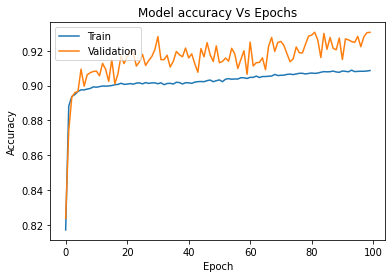

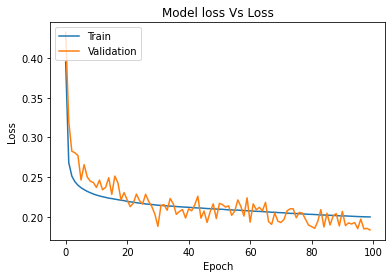

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a id ="8"></a>


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Results & Conclusion</p>

> **Bagging with Decision tree is performing the best according to recall and roc.**

> **For a credit insurance problem, I would want to go with recall here.**